<table {'class': 'wikitable sortable'}>YearPhysicsChemistryPhysiologyor MedicineLiteraturePeaceEconomics1901Röntgen, WilhelmWilhelm RöntgenHoff, Jacobus Henricus van 'tJacobus Henricus van 't Hoffvon Behring, Emil AdolfEmil ....


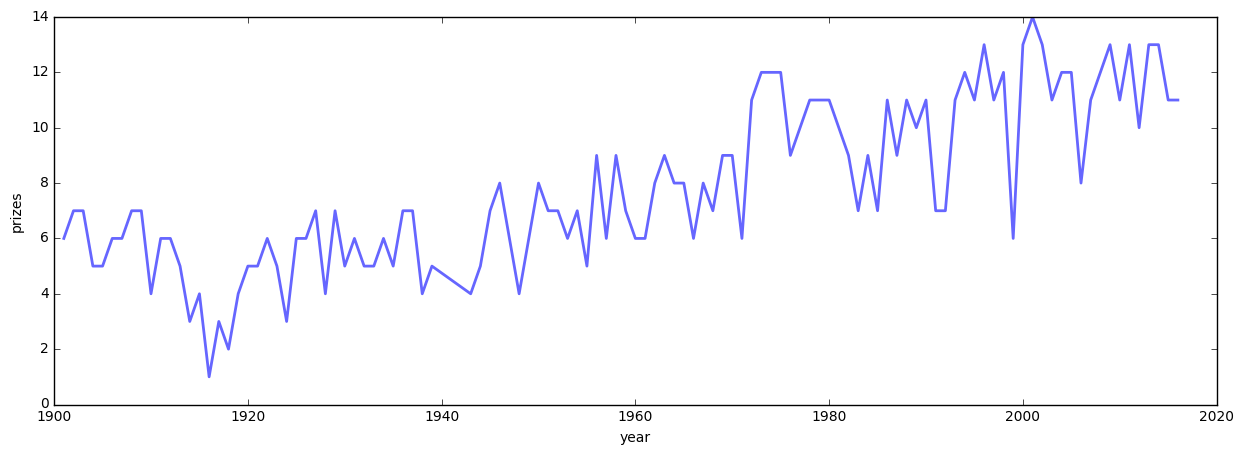

length of the dataset is 888 ..


In [48]:
from datetime import datetime
from lxml import html
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns=50
def print_element(element):
    print("<%s %s>%s...." %(element.tag, element.attrib, element.text_content()[:200].replace("\n","")))
page = requests.get("https://en.wikipedia.org/wiki/List_of_Nobel_laureates")
tree = html.fromstring(page.text)
""" for Reading  the tables with class 'wikitable sortable' """

table = tree.xpath('//table[@class="wikitable sortable"]')[0] 
print_element(table)

""" Retrive the first row of table """
subjects = [subject[0].text_content().replace("\n"," ") for subject in table.xpath('tr')[0][1:]]
subjects

""" Retrieve the year from the table """
years = [year[0].text for year in table.xpath('tr')[1:-1]]
years

""" Retrieve the winners Data / Testing for a single row 
for index, item in enumerate(table.xpath('tr')[1][1:]):
    subject = subjects[index]
    print("%s : " %subject)
    for winner in item.xpath('span[@class="vcard"]/span/a'):
        winner_name = winner.attrib["title"]
        winner_href = winner.attrib["href"]
        print("%s- " %winner_name)
        print("%s- " %winner_href) 
"""
""" Retrieving the whole table """
year_list = []
name_list = []
url_list  = []
sub_list  = []

for year_index, year in enumerate(years):
    for index, item in enumerate(table.xpath('tr')[year_index+1][1:]):
        subject = subjects[index]
        for winner in item.xpath('span[@class="vcard"]/span/a'):
            winner_name = winner.attrib["title"]
            winner_href = winner.attrib["href"]
            year_list.append(year)
            name_list.append(winner_name)
            url_list.append(winner_href)
            sub_list.append(subject)
            
df = pd.DataFrame(name_list, columns=["winner_name"])
df["subject"]  = sub_list
df["year"]     = year_list
df["year"]=df["year"].astype(np.int32)
df["url_list"] = url_list


""" Number of prize per year """
prize = df["year"].value_counts().sort_index()
prize

""" graph of the number of prizes to the year"""
plt.figure(figsize=(15,5))
plt.plot(prize.index, prize.values, linewidth=2, alpha=.6)
plt.xlabel("year")
plt.ylabel("prizes")
plt.show();
print("length of the dataset is %d .." %len(df))

